# Data Visualization and Exploratory Data Analysis


In [ ]:
# Imports
from google.colab import files
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Run me and upload your CSV file directly!

data = files.upload()
try:
  df = pd.read_csv(io.StringIO(data[[key for key in data][0]].decode("utf-8")))
  print("Data successfully uploaded.")
except Exception as error:
  print("DM Hairan or Lukas on Slack for help!")
  print(f'Error Message: {error}')

Saving healthcare_dataset_stroke_data.csv to healthcare_dataset_stroke_data (2).csv
Data successfully uploaded.


---
# Exploratory Data Analysis and Data Visualization

* **Dataset name**:  Stroke Prediction Dataset

* **Link to dataset**:  https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

* **Brief dataset description**:  This dataset presents multiple information on patients (gender, age, disease history, health parameters, smoking status, etc) and whether they experience strokes.


---
# Data Preparation


In [ ]:
df.shape

(5110, 12)

In [ ]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Column 'id' provides no useful information, so drop it.

In [ ]:
df = df.drop(['id'], axis=1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
# examine if there is null value
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
# 'bmi' has less than 4% null values
100*(df.isna().sum())/len(df)

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [ ]:
# fill in null values with average BMI
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

In [ ]:
# No null now
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
# Notice there are 'Unknown' in 'smoking_status'
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [ ]:
# There are more than 30% unknown smoking status, consider to drop this feature
100 * df['smoking_status'].value_counts()['Unknown'] / len(df)

30.21526418786693

In [ ]:
df.drop(['smoking_status'], axis = 1, inplace = True)
# Now done with missing values

# Numerical and Categorical Data


In [ ]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
stroke                 int64
dtype: object

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,1


In [ ]:
df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
# convert ever_married(Yes/No) to 1/0 for future counting and visualization
df['ever_married'] = df['ever_married'].apply(lambda x: 1 if (x=='Yes') else 0)

In [ ]:
# create a new column named 'have_stroke' to store Yes/No for future groupby and visualization
# since Yes/No is slightly easier to understand
df['have_stroke'] = df['stroke'].apply(lambda x: 'Yes' if (x==1) else 'No')

In [ ]:
df.head(8)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke,have_stroke
0,Male,67.0,0,1,1,Private,Urban,228.69,36.600000,1,Yes
1,Female,61.0,0,0,1,Self-employed,Rural,202.21,28.893237,1,Yes
2,Male,80.0,0,1,1,Private,Rural,105.92,32.500000,1,Yes
3,Female,49.0,0,0,1,Private,Urban,171.23,34.400000,1,Yes
4,Female,79.0,1,0,1,Self-employed,Rural,174.12,24.000000,1,Yes
5,Male,81.0,0,0,1,Private,Urban,186.21,29.000000,1,Yes
6,Male,74.0,1,1,1,Private,Rural,70.09,27.400000,1,Yes
7,Female,69.0,0,0,0,Private,Urban,94.39,22.800000,1,Yes


---
# Data Exploration


In [ ]:
df.describe()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,0.656164,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,0.475034,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,1.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,1.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke,have_stroke
0,Male,67.0,0,1,1,Private,Urban,228.69,36.600000,1,Yes
1,Female,61.0,0,0,1,Self-employed,Rural,202.21,28.893237,1,Yes
2,Male,80.0,0,1,1,Private,Rural,105.92,32.500000,1,Yes
3,Female,49.0,0,0,1,Private,Urban,171.23,34.400000,1,Yes
4,Female,79.0,1,0,1,Self-employed,Rural,174.12,24.000000,1,Yes


First, group data by gender: all data are similar among genders, indicating a light bias in this dataset.

In [ ]:
grouped_gender = df.groupby('gender')
grouped_gender.agg({'age':['mean'], 'avg_glucose_level':['mean','min','max'], 'bmi':['mean','min','max'], 'hypertension':['mean'], 'heart_disease':['mean'], 'stroke':['mean']})


age avg_glucose_level                        bmi              \
             mean              mean     min     max       mean   min   max   
gender                                                                       
Female  43.757395        104.057809   55.12  267.76  29.060168  10.3  78.0   
Male    42.483385        109.088520   55.22  271.74  28.659998  11.5  97.6   
Other   26.000000        143.330000  143.33  143.33  22.400000  22.4  22.4   

       hypertension heart_disease    stroke  
               mean          mean      mean  
gender                                       
Female     0.092184      0.037742  0.047094  
Male       0.104965      0.077069  0.051064  
Other      0.000000      0.000000  0.000000

Then try to group by work types:
It seems that self-employed workers have higher average hypertension/heart disease/stroke percentages, while never-worked people have very surprisingly none of these cases;
however, it's also notable that self-employed workers have the highest average age, whereas never_worked people have the lowest avg age.

In [ ]:
grouped_work = df.groupby('work_type')
df_work = grouped_work.agg({'age':['mean'], 'avg_glucose_level':['mean','min','max'], 'bmi':['mean','min','max'], 'hypertension':['mean'], 'heart_disease':['mean'], 'stroke':['mean']})
df_work

age avg_glucose_level                       bmi        \
                    mean              mean    min     max       mean   min   
work_type                                                                    
Govt_job       50.879756        107.779772  55.27  266.59  30.455125  16.0   
Never_worked   16.181818         96.042727  59.99  161.28  25.545455  14.6   
Private        45.503932        106.796844  55.12  271.74  30.249617  11.5   
Self-employed  60.201465        112.645446  55.23  267.61  30.141029  11.3   
children        6.841339         94.400277  55.34  219.81  20.244238  10.3   

                    hypertension heart_disease    stroke  
                max         mean          mean      mean  
work_type                                                 
Govt_job       57.7     0.111111      0.054795  0.050228  
Never_worked   44.9     0.000000      0.000000  0.000000  
Private        97.6     0.096068      0.054017  0.050940  
Self-employed  64.8     0.175824      0.098901  0.079365  
children       41.7     0.000000      0.001456  0.002911

There're slight difference in age and all health parameters between people living in rural and urban areas.

In [ ]:
grouped_residence = df.groupby('Residence_type')
grouped_residence.agg({'age':['mean'], 'avg_glucose_level':['mean','min','max'], 'bmi':['mean','min','max'], 'hypertension':['mean'], 'heart_disease':['mean'], 'stroke':['mean']})

age avg_glucose_level                       bmi        \
                     mean              mean    min     max       mean   min   
Residence_type                                                                
Rural           42.900811        106.375235  55.12  271.74  28.894176  10.3   
Urban           43.542126        105.927307  55.22  267.76  28.892328  11.3   

                     hypertension heart_disease    stroke  
                 max         mean          mean      mean  
Residence_type                                             
Rural           97.6     0.099841      0.053302  0.045346  
Urban           78.0     0.095146      0.054700  0.052003

We find an interesting difference between patients with strokes and without:
patients with strokes are older in average, have higher average glucose level, high bmi, more likely to have a previous hypertension and heart disease.

In [ ]:
grouped_stroke = df.groupby('have_stroke')
grouped_stroke.agg({'age':['mean'], 'avg_glucose_level':['mean','min','max'], 'bmi':['mean','min','max'], 'hypertension':['mean'], 'heart_disease':['mean']})

age avg_glucose_level                       bmi        \
                  mean              mean    min     max       mean   min   
have_stroke                                                                
No           41.971545        104.795513  55.12  267.76  28.825388  10.3   
Yes          67.728193        132.544739  56.11  271.74  30.217789  16.9   

                  hypertension heart_disease  
              max         mean          mean  
have_stroke                                   
No           97.6     0.088871      0.047110  
Yes          56.6     0.265060      0.188755

---
# Data Visualization


Divide into two datasets of patients having or not having strokes for future convenience:

In [ ]:
is_stroke = df[df['have_stroke'] == 'Yes']
not_stroke = df[df['have_stroke'] == 'No']

In [ ]:
is_stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke,have_stroke
0,Male,67.0,0,1,1,Private,Urban,228.69,36.600000,1,Yes
1,Female,61.0,0,0,1,Self-employed,Rural,202.21,28.893237,1,Yes
2,Male,80.0,0,1,1,Private,Rural,105.92,32.500000,1,Yes
3,Female,49.0,0,0,1,Private,Urban,171.23,34.400000,1,Yes
4,Female,79.0,1,0,1,Self-employed,Rural,174.12,24.000000,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...
244,Male,57.0,0,0,1,Private,Rural,84.96,36.700000,1,Yes
245,Female,14.0,0,0,0,children,Rural,57.93,30.900000,1,Yes
246,Female,75.0,0,0,1,Self-employed,Rural,78.80,29.300000,1,Yes
247,Male,71.0,1,0,1,Self-employed,Rural,87.80,28.893237,1,Yes


Gender:
1. There's little gender bias in terms of patients' ages in this dataset (left);
2. Among patients who have strokes, there are more females than males (right).

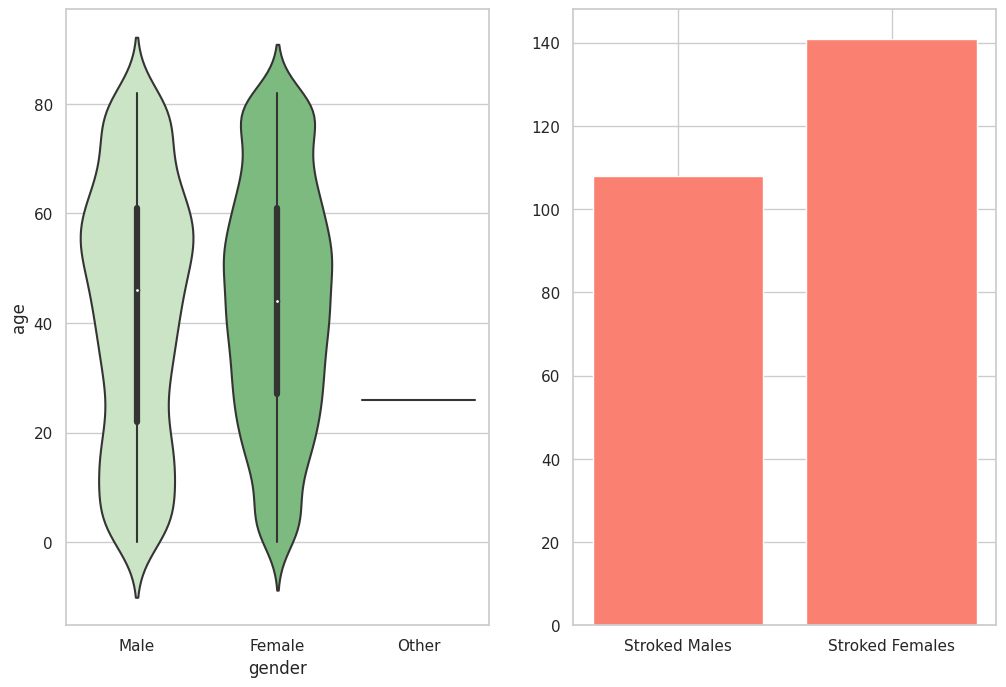

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(12,8))
sns.set(style = 'whitegrid')
sns.violinplot(x = df['gender'], y = df['age'], palette="Greens", ax = ax1)

x = ['Stroked Males', 'Stroked Females']
height = [is_stroke['gender'].value_counts()['Male'], is_stroke['gender'].value_counts()['Female']]
ax2.bar(x, height, width=0.8, bottom=None, align='center', color='salmon')
plt.show()

Now we'll visualize the relationship between whether strokes happen and each parameters we find significant when grouping by strokes above:

1) The average age of patients with strokes are higher than that of patients with no strokes;

<BarContainer object of 2 artists>

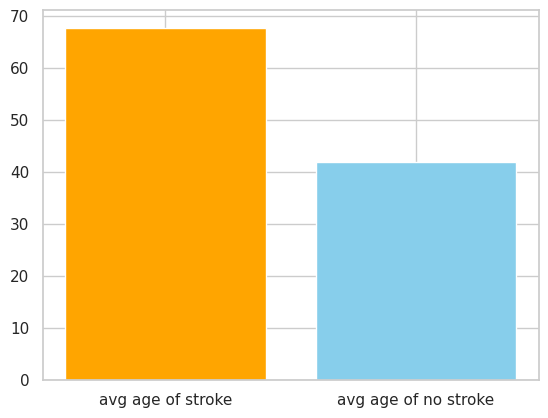

In [ ]:
x = ['avg age of stroke', 'avg age of no stroke']
height = [is_stroke['age'].mean(), not_stroke['age'].mean()]
bar_colors = ['orange','skyblue']
plt.bar(x, height, width=0.8, bottom=None, align='center', color=bar_colors)

2) There's a higher rate of having hypertension or heart disease previously among patients who have strokes than patients who have not;

<BarContainer object of 2 artists>

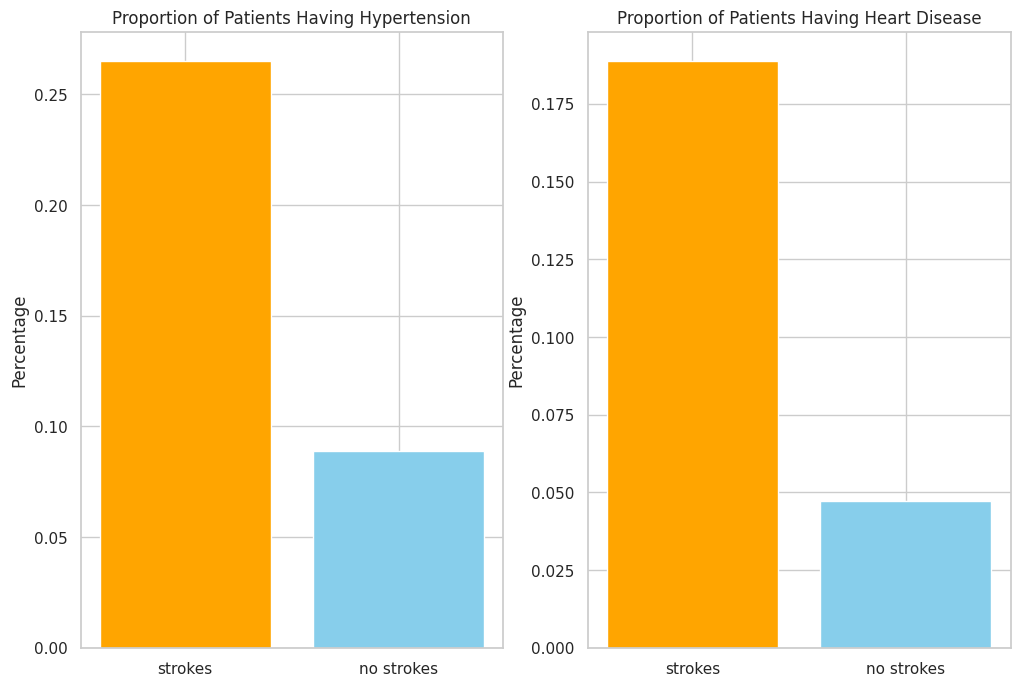

In [ ]:
# relation between hypertension and stroke / b/w heart_disease and stroke
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(12,8))
x1 = ['strokes', 'no strokes']
cnt1 = [is_stroke['hypertension'].sum()/len(is_stroke), not_stroke['hypertension'].sum()/len(not_stroke)]
bar_colors = ['orange','skyblue']
ax1.set_title('Proportion of Patients Having Hypertension')
ax1.set_ylabel('Percentage')
ax1.bar(x1, cnt1, width=0.8, bottom=None, align='center', color=bar_colors)

x2 = ['strokes', 'no strokes']
cnt2 = [is_stroke['heart_disease'].sum()/len(is_stroke), not_stroke['heart_disease'].sum()/len(not_stroke)]
bar_colors = ['orange','skyblue']
ax2.set_title('Proportion of Patients Having Heart Disease')
ax2.set_ylabel('Percentage')
ax2.bar(x2, cnt2, width=0.8, bottom=None, align='center', color=bar_colors)

3) Is there any relationship between stroke and level of glucose?
We observe that there's a significant higher proportion of patients with glucose level higher than 150 in stroke group than no stroke group;

<ipython-input-168-7dca38e32c30>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=is_stroke['avg_glucose_level'], color='pink',
<ipython-input-168-7dca38e32c30>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=not_stroke['avg_glucose_level'], color='skyblue',


Text(0.5, 0, 'Glucose Level of Patients NOT having Strokes')

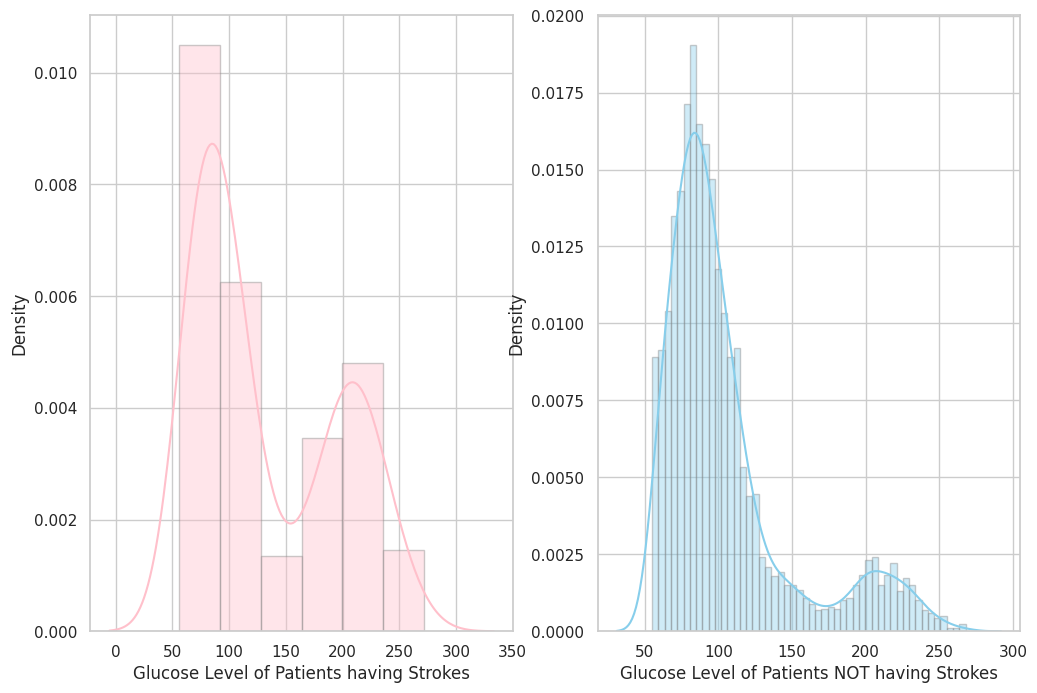

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(12,8))
sns.distplot(a=is_stroke['avg_glucose_level'], color='pink',
             hist_kws={"edgecolor": 'tab:gray'}, ax = ax1)
ax1.set_xlabel('Glucose Level of Patients having Strokes')

sns.distplot(a=not_stroke['avg_glucose_level'], color='skyblue',
             hist_kws={"edgecolor": 'tab:gray'}, ax = ax2)
ax2.set_xlabel('Glucose Level of Patients NOT having Strokes')

4) What about the relationship between stroke and bmi?
Not that significant compared to previous ones.

<ipython-input-169-4157810b0eaa>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=is_stroke['bmi'], color='pink',
<ipython-input-169-4157810b0eaa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=not_stroke['bmi'], color='skyblue',


Text(0.5, 0, 'BMI of Patients NOT having Strokes')

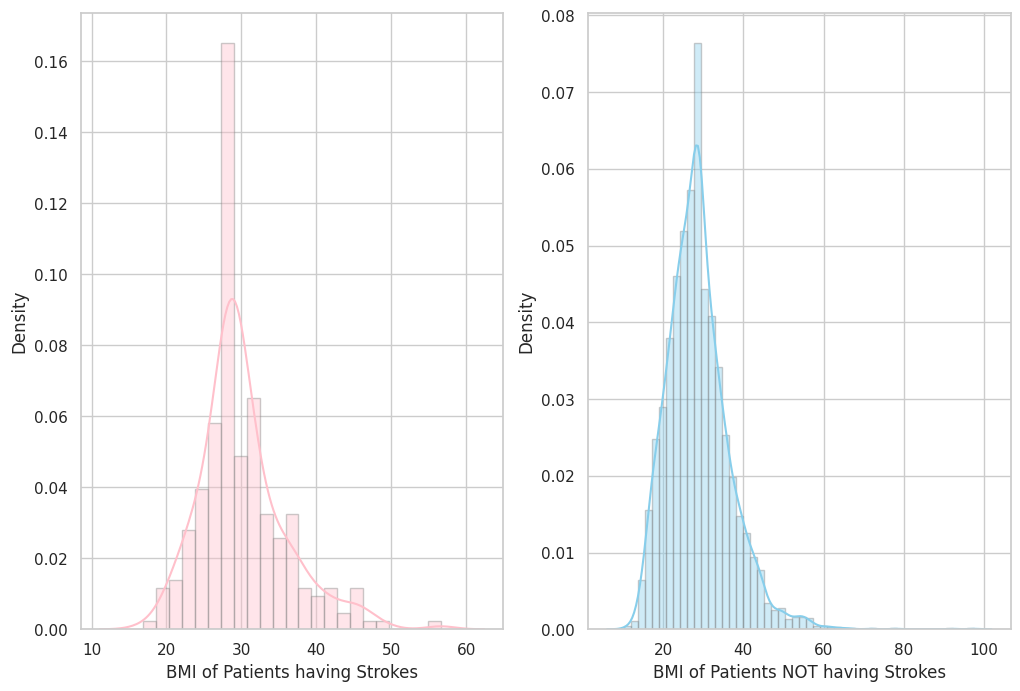

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(12,8))
sns.distplot(a=is_stroke['bmi'], color='pink',
             hist_kws={"edgecolor": 'tab:gray'}, ax = ax1)
ax1.set_xlabel('BMI of Patients having Strokes')

sns.distplot(a=not_stroke['bmi'], color='skyblue',
             hist_kws={"edgecolor": 'tab:gray'}, ax = ax2)
ax2.set_xlabel('BMI of Patients NOT having Strokes')

Bivariate Analysis ([Plot Ideas](https://www.kaggle.com/residentmario/bivariate-plotting-with-pandas))
*   Understand the relationships between variables with...
    * [Scatter Plots](https://seaborn.pydata.org/tutorial/relational.html#relating-variables-with-scatter-plots)
    * [Line Plots](https://seaborn.pydata.org/tutorial/relational.html#emphasizing-continuity-with-line-plots)
    * [Regression Plots](https://seaborn.pydata.org/tutorial/regression.html)
    * [Heat Maps](https://seaborn.pydata.org/tutorial/distributions.html#visualizing-bivariate-distributions)
    * and [MORE](https://www.data-to-viz.com/#explore)....



Use boxplots to gain a clearer look upon glucose level VS stroke, and bmi VS stroke

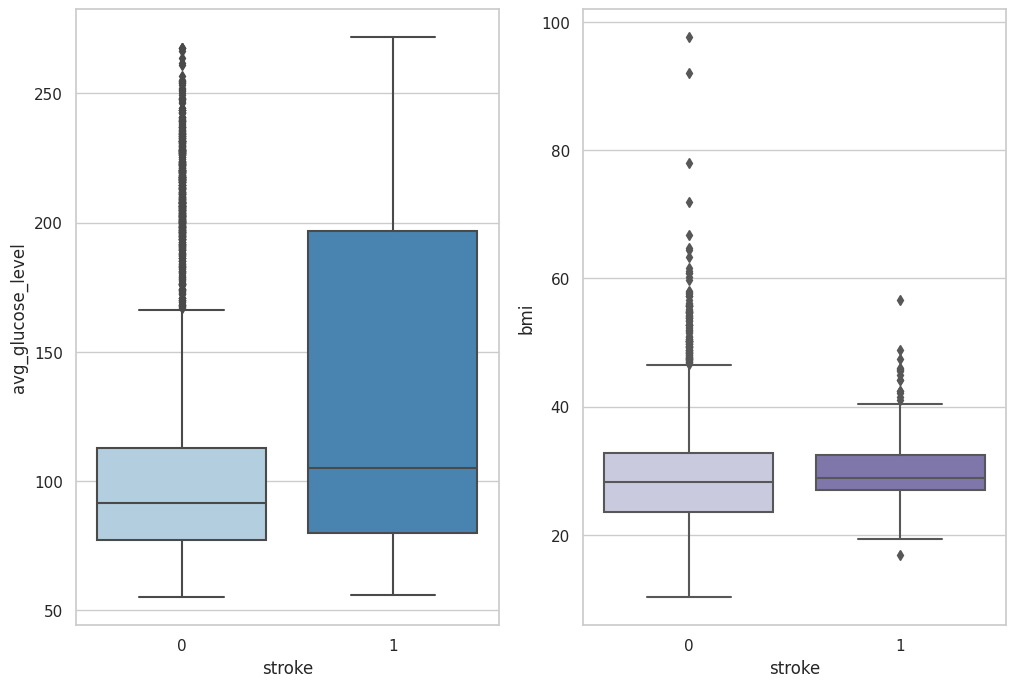

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(12,8))
sns.boxplot(x = df['stroke'], y = df['avg_glucose_level'], palette="Blues", ax = ax1)
sns.boxplot(x = df['stroke'], y = df['bmi'], palette="Purples", ax = ax2)
plt.show()

Is there a relationship between glucose level and bmi then??

  Not that significant.

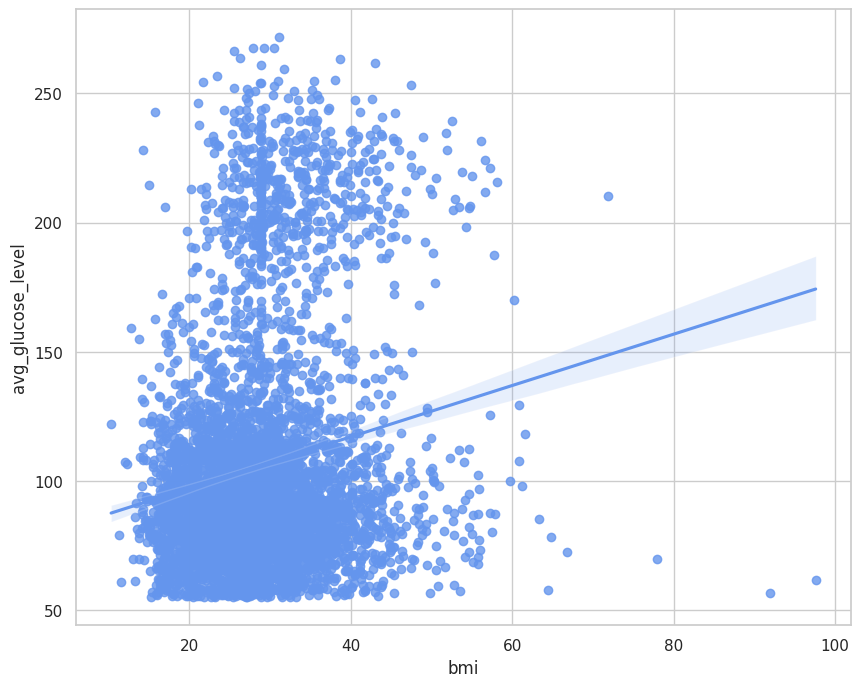

In [ ]:
plt.figure(figsize=(10, 8))
sns.regplot(x = df['bmi'], y = df['avg_glucose_level'], color = 'cornflowerblue')
plt.show()

Now let's visualize what we discover when grouping by work types:
1. Significant differences of hypertension rate and heart disease rate among work types;
2. But notice that ages also differ a lot among work types.

 -- Is there a relationship between age and hypertension rate or heart disease then?

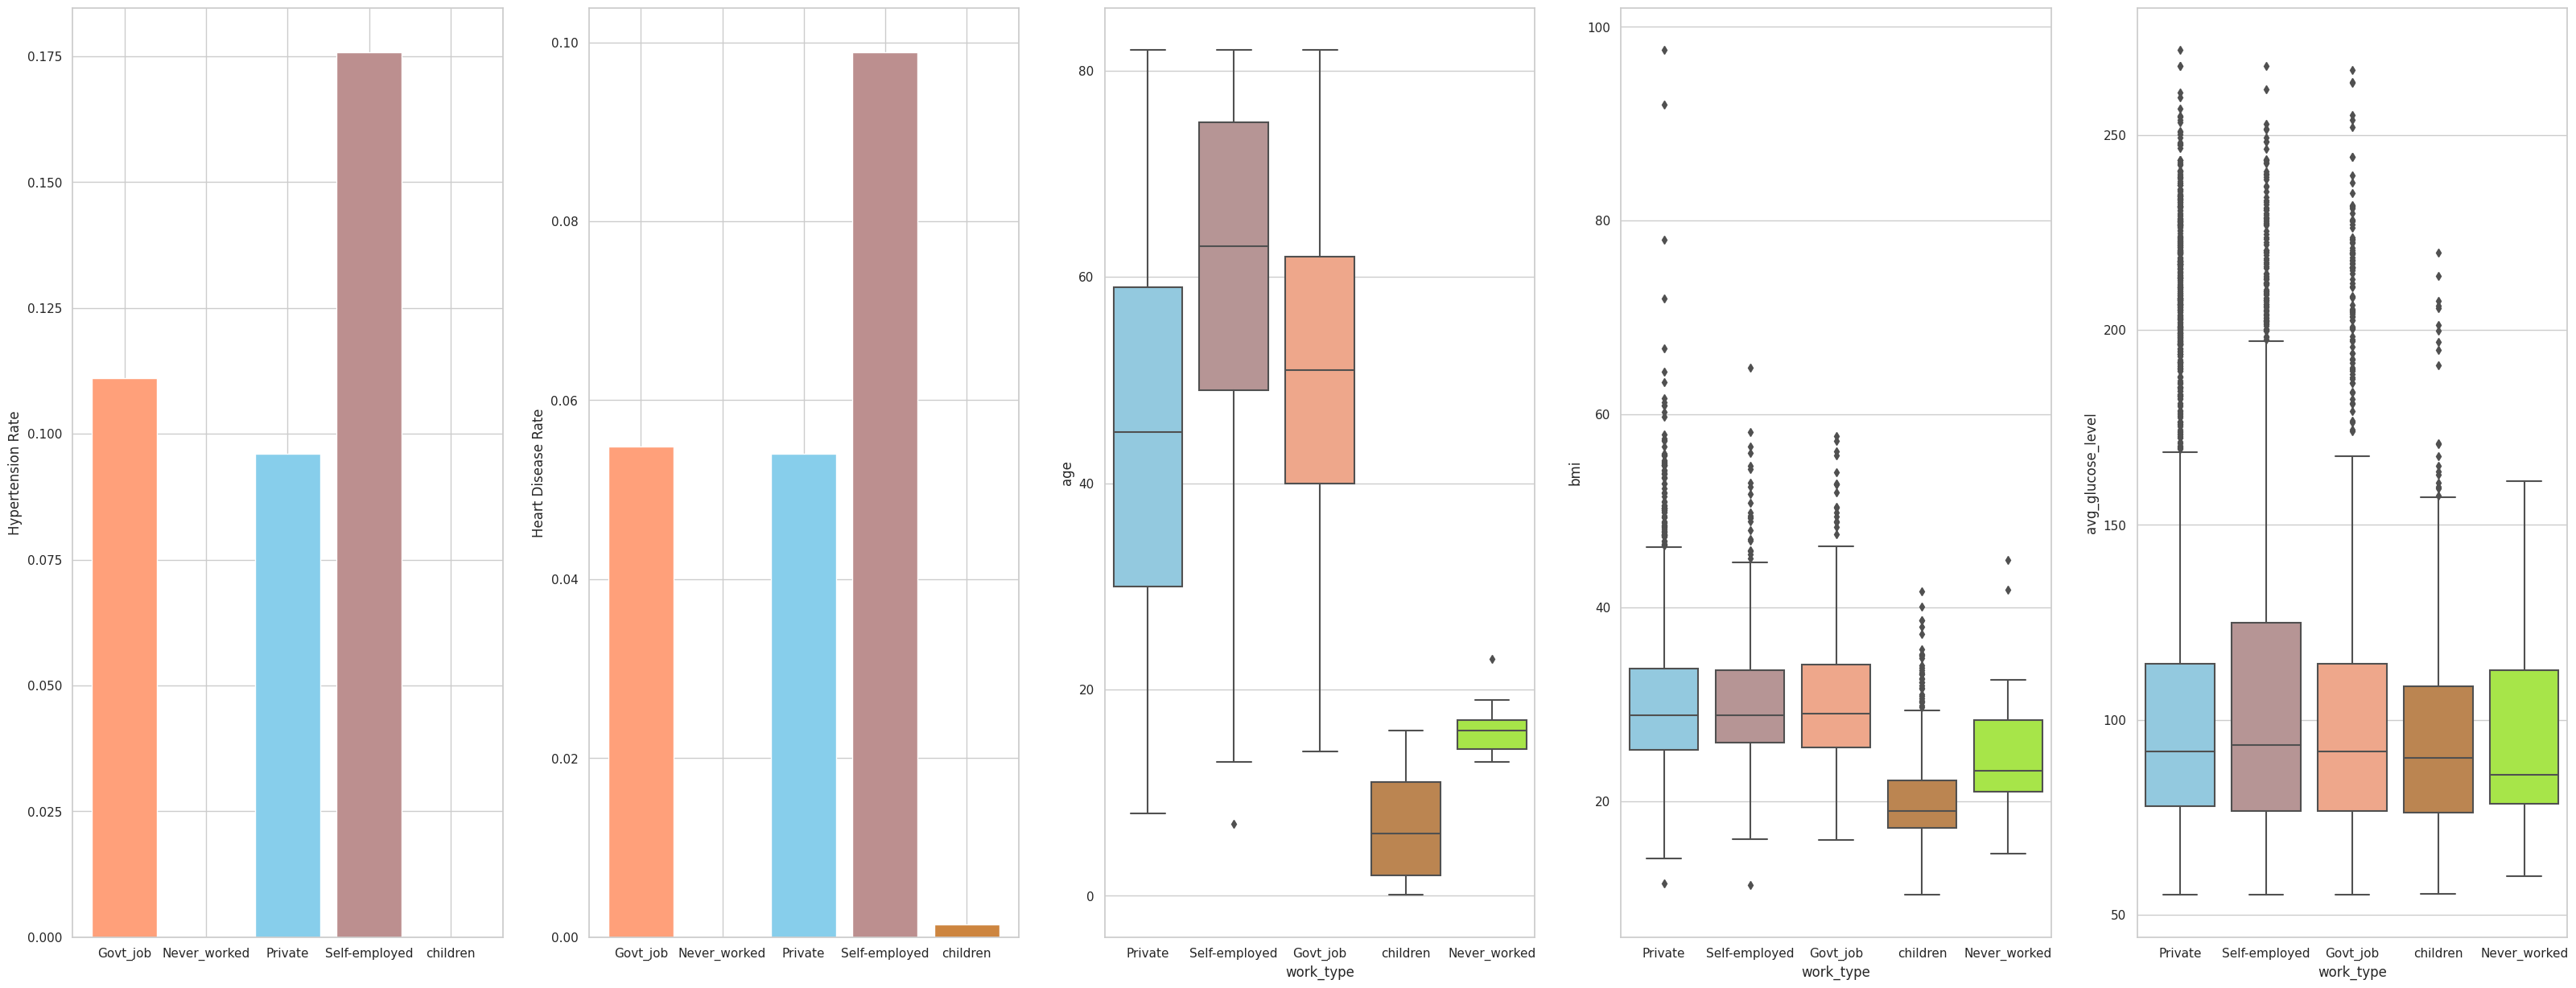

In [ ]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows = 1, ncols = 5, figsize=(40,15))
my_pal = {"Private": "skyblue", "Self-employed": "rosybrown", "Govt_job":"lightsalmon", "children": "peru", "Never_worked": "greenyellow"}
sns.boxplot(x = df['work_type'], y = df['avg_glucose_level'], palette=my_pal, ax = ax5)
sns.boxplot(x = df['work_type'], y = df['bmi'], palette=my_pal, ax = ax4)
sns.boxplot(x = df['work_type'], y = df['age'], palette=my_pal, ax = ax3)

x1 = list(df_work.index)
height1 = df_work[('hypertension','mean')]
bar_colors = ['lightsalmon','greenyellow','skyblue','rosybrown','peru']
ax1.bar(x1, height1, width=0.8, bottom=None, align='center', color=bar_colors)
ax1.set_ylabel('Hypertension Rate')

x2 = list(df_work.index)
height2 = df_work[('heart_disease','mean')]
bar_colors = ['lightsalmon','greenyellow','skyblue','rosybrown','peru']
ax2.bar(x2, height2, width=0.8, bottom=None, align='center', color=bar_colors)
ax2.set_ylabel('Heart Disease Rate')
plt.show()

Patients with hypertension have a significant left-skewed distribution (meaning that more density in higher ages) compared to patients without hypertension, which have a more even distribution of age.

<ipython-input-173-a03c54926cf2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=is_hyper['age'], color='pink',
<ipython-input-173-a03c54926cf2>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=is_not_hyper['age'], color='skyblue',


Text(0.5, 0, 'Age distribution of patients without hypertension')

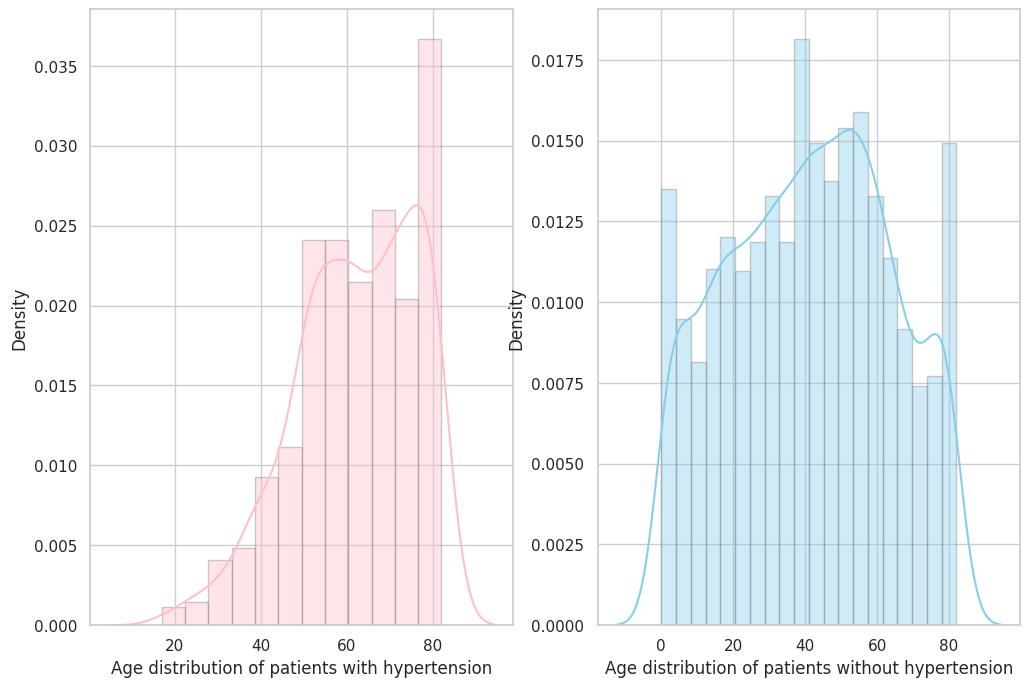

In [ ]:
is_hyper = df[df['hypertension']==1]
is_not_hyper = df[df['hypertension']==0]

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(12,8))
sns.distplot(a=is_hyper['age'], color='pink',
             hist_kws={"edgecolor": 'tab:gray'}, ax = ax1)
ax1.set_xlabel('Age distribution of patients with hypertension')

sns.distplot(a=is_not_hyper['age'], color='skyblue',
             hist_kws={"edgecolor": 'tab:gray'}, ax = ax2)
ax2.set_xlabel('Age distribution of patients without hypertension')

Similarly, patients with heart disease have a significant left-skewed distribution (meaning that more density in higher ages) compared to patients without heart disease, which have a more even distribution of age.

<ipython-input-174-580c771503f5>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=is_hyper['age'], color='pink',
<ipython-input-174-580c771503f5>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=is_not_hyper['age'], color='skyblue',


Text(0.5, 0, 'Age distribution of patients without heart disease')

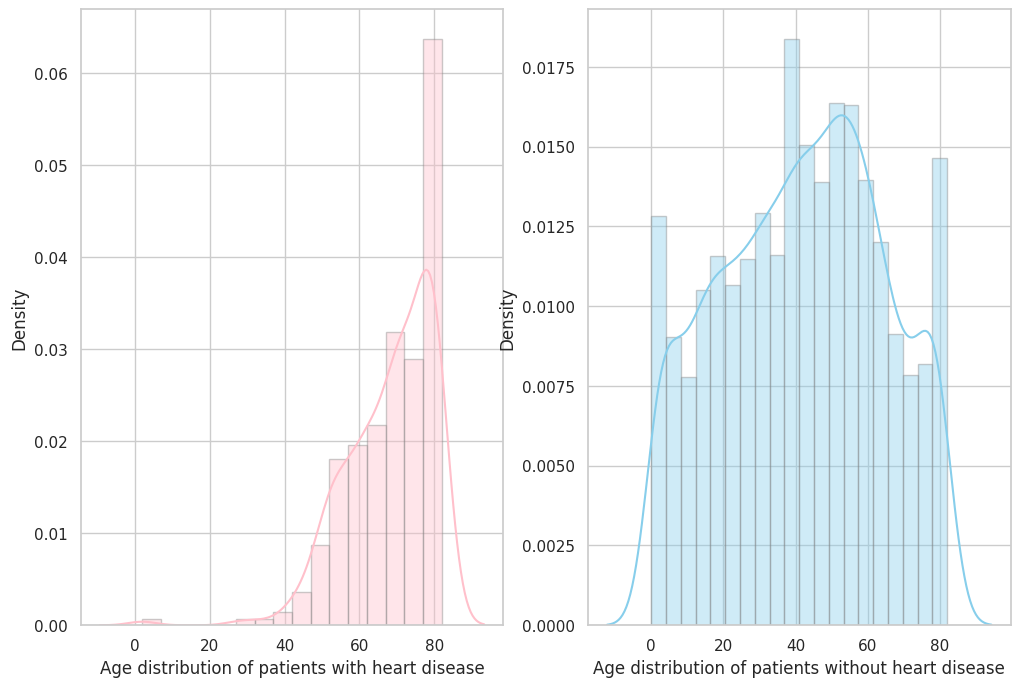

In [ ]:
is_hyper = df[df['heart_disease']==1]
is_not_hyper = df[df['heart_disease']==0]

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(12,8))
sns.distplot(a=is_hyper['age'], color='pink',
             hist_kws={"edgecolor": 'tab:gray'}, ax = ax1)
ax1.set_xlabel('Age distribution of patients with heart disease')

sns.distplot(a=is_not_hyper['age'], color='skyblue',
             hist_kws={"edgecolor": 'tab:gray'}, ax = ax2)
ax2.set_xlabel('Age distribution of patients without heart disease')

We can also examine relationships of age and other parameters:

1) age and average glucose level: at older ages, there are much more higher glucose level appearing;

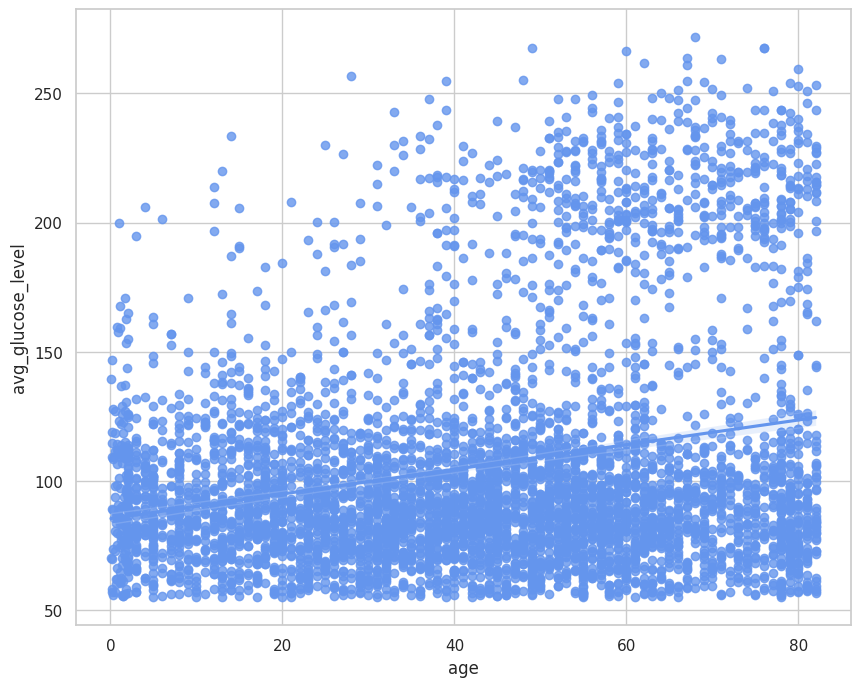

In [ ]:
plt.figure(figsize=(10, 8))
sns.regplot(x = df['age'], y = df['avg_glucose_level'], color = 'cornflowerblue')
plt.show()

2) No significant relationship between age and bmi;

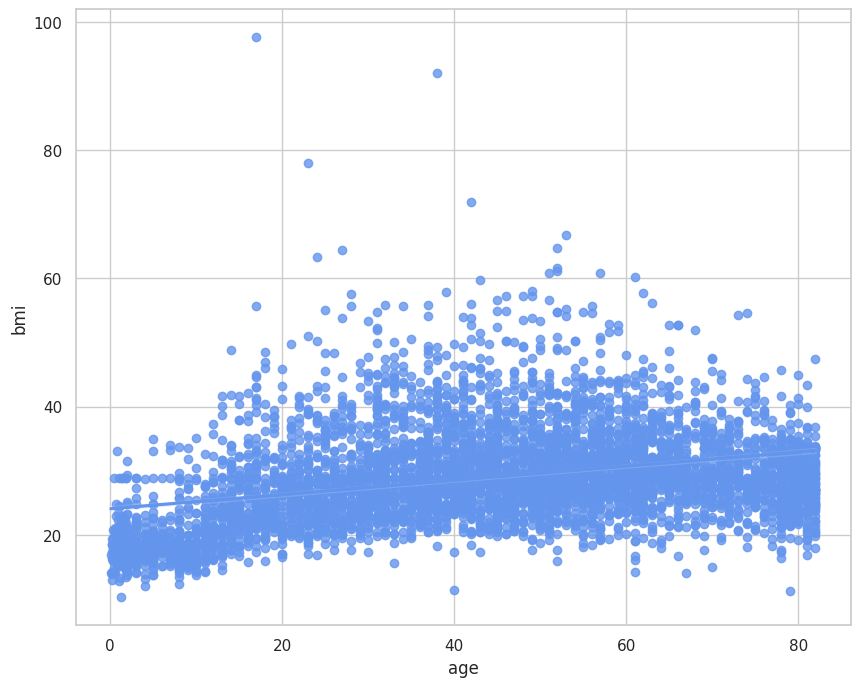

In [ ]:
plt.figure(figsize=(10, 8))
sns.regplot(x = df['age'], y = df['bmi'], color = 'cornflowerblue')
plt.show()

3) Just curious: is ever_married correlated with age?

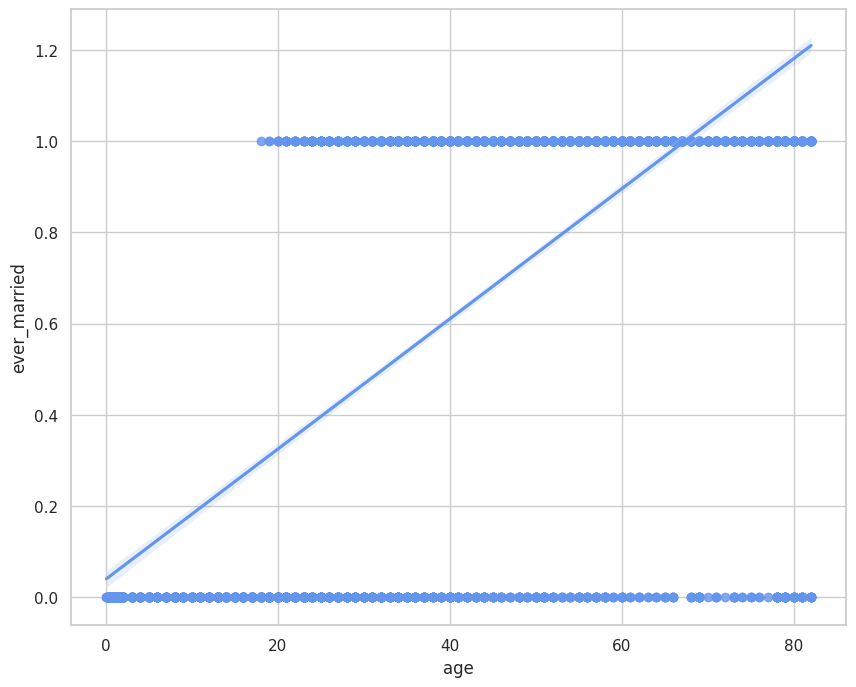

In [ ]:
plt.figure(figsize=(10, 8))
sns.regplot(x = df['age'], y = df['ever_married'], color = 'cornflowerblue')
plt.show()

It makes sense that age distribution of patients that have not married is more right-skewed that that of patients that have ever married.

<ipython-input-178-0f0511536f23>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=ever_married['age'], color='pink',
<ipython-input-178-0f0511536f23>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=not_married['age'], color='skyblue',


Text(0.5, 0, 'Age distribution of patients that have not married')

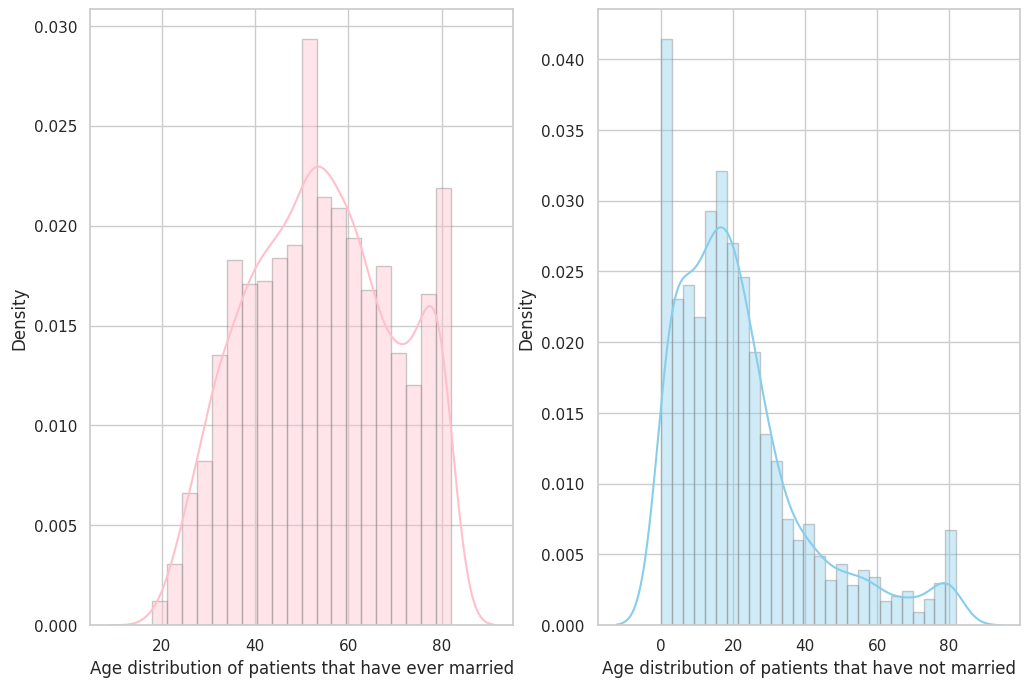

In [ ]:
ever_married = df[df['ever_married']==1]
not_married = df[df['ever_married']==0]

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(12,8))
sns.distplot(a=ever_married['age'], color='pink',
             hist_kws={"edgecolor": 'tab:gray'}, ax = ax1)
ax1.set_xlabel('Age distribution of patients that have ever married')

sns.distplot(a=not_married['age'], color='skyblue',
             hist_kws={"edgecolor": 'tab:gray'}, ax = ax2)
ax2.set_xlabel('Age distribution of patients that have not married')